# Introduction

In this section we will examine the dataset and answer the following questions according to some of the services provided by the company and how they affect the churn and satisfaction of the customers:
<ul>
<li>What offers received more churn?</li>
<li>How satisfied are customers subscribed to premium tech support?</li>
<li>Which contract types lead to more churn?</li>
</ul>

# Import and load data

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_loader import load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_data("telco.csv", "raw", False) # load the raw data

# 1- Offers that received more churn

In this analytics, we will find which three offers among offer A, B, C, D, and E received more churn from customers

## Drop null values

For this part, we will drop the null values from the offer column as it indicates that the customer does not use any offer

In [4]:
data_copy = data.copy()
data_copy.Offer = data_copy.Offer.dropna()

## Group Offer by Churn Score

We will now group the offer data by Churn Score, take the sum of scores, and sort them

In [5]:
# Group the dataset by the sum of Churn Score per Offer 
churn_by_offer = data_copy.groupby('Offer')['Churn Score'].sum().sort_values(ascending=False)

## Graph a bar plot of Churn Score per Offer

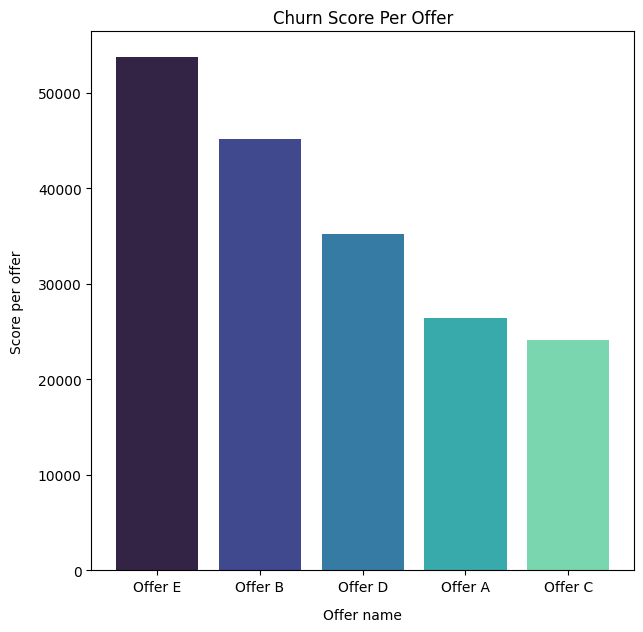

In [ ]:
x = [0, 1, 2, 3, 4]

plt.figure(figsize=(7,7))
# bar plot = x: the indexes of churn_by_offer list. y: the value of each index
plt.bar(churn_by_offer.index[x], churn_by_offer.iloc[x], color=(sns.color_palette("mako", len(churn_by_offer))))
plt.title("Churn Score Per Offer")
plt.xlabel("Offer name", labelpad=10)
plt.ylabel("Score per offer", labelpad=10)
plt.savefig("../Visualizations/Churn_per_offer.png")

And we can see that offer E receives more churn while Offer C receives less churn

# 2-How satisfied are customers subscribed to premium tech support?

In this section, we will examine the customers that are subscribed to premium tech support and see the percentage of ones that are satisfied and the ones that are not

## Find subscribed customers with high and low satisfaction scores

In [7]:
# Find number of customers that are subscribed to premium tech support and whose satisfaction score is more than
# or equal to 3
high = len(data[(data["Premium Tech Support"] == "Yes") & (data["Satisfaction Score"] >= 3)])
# The number of customers that have a low satisfaction score is the number of all customers minus the ones with high score
low = len(data) - high

## Plot the percentages

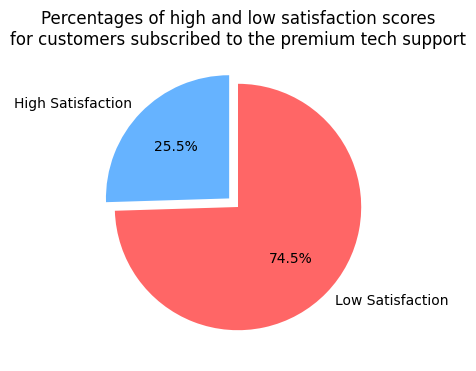

In [8]:
labels = ['High Satisfaction', 'Low Satisfaction'] # Labels for the two categories (high and low)
sizes = [high, low]
colors = ['#66b3ff', '#ff6666'] # colors for each category
explode = (0.1, 0) 

plt.figure(figsize=(5,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Percentages of high and low satisfaction scores\nfor customers subscribed to the premium tech support')
plt.savefig("../Visualizations/Percentage_high_low_subscribed.png")

We can see that customers subscribed to the premium tech support were mostly less satisfied

# 3 - Which contract types lead to more churn?

In this part, we will find which contract types lead to more or less churn among customers

## Find the value counts of customer churn per each contract

In [12]:
# The value counts of contract types of customers that have churn sorted decreasingly
churn_contract = data[data["Churn Label"] == "Yes"]["Contract"].value_counts().sort_values(ascending = False)

## Plot the result

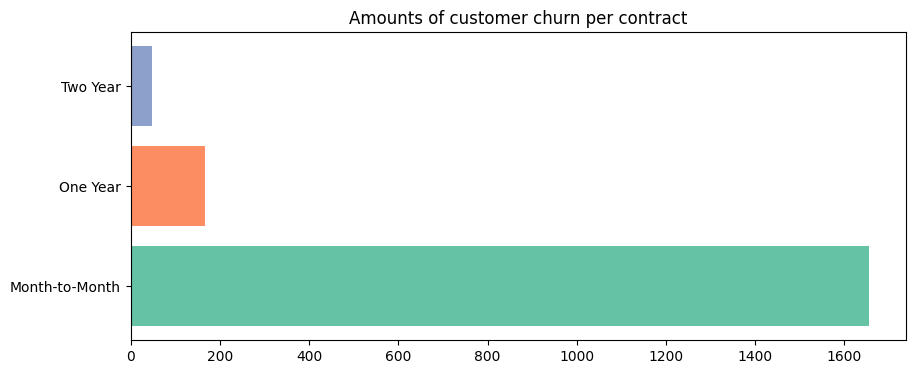

In [10]:
x = [0, 1, 2]

plt.figure(figsize=(10,4))
plt.barh(churn_contract.index[x], churn_contract.iloc[x], color=((sns.color_palette("Set2"))))
plt.title("Amounts of customer churn per contract")
plt.savefig("../Visualizations/churn_per_contract.png")

And here we conclude that the Two Year contract receives less churn, and that Month-to-Month contract receives more